# Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "CarPricesData.csv". This file contains 1435 car prices data.

## Data description
The business meaning of each column in the data is as below. This is present as
an excel file named Data Dictionary / Business Dictionary



In [1]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Reading the dataset
import pandas as pd
import numpy as np
resData=pd.read_csv("C:/Users/Siddhali/OneDrive/Desktop/restaurant_data.csv", encoding='latin')
print('Shape before deleting duplicate values:',resData.shape)

# Removing duplicate rows if any
# CarPricesData=CarPricesData.drop_duplicates() 
# print('Shape After deleting duplicate values:', CarPricesData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
resData

Shape before deleting duplicate values: (8368, 17)


,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590194,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


# Defining the problem statement: 
#### Create a ML model which can predict the revenue of restaurants
* Target Variable: Price
* Predictors: Age, KM, FuelType, CC etc.

In [3]:
resData.columns

Index(['Name', 'Location', 'Cuisine', 'Rating', 'Seating Capacity',
       'Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Chef Experience Years', 'Number of Reviews', 'Avg Review Length',
       'Ambience Score', 'Service Quality Score', 'Parking Availability',
       'Weekend Reservations', 'Weekday Reservations', 'Revenue'],
      dtype='object')

<Axes: >

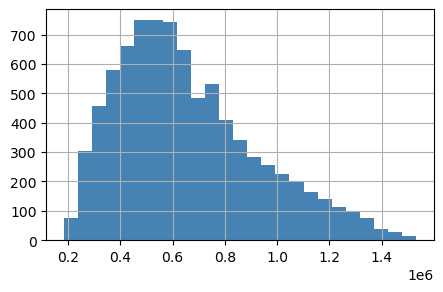

In [2]:
resData['Revenue'].hist(figsize=(5,3),bins=25, color='steelblue') 

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a <b>supervised ML Regression model</b>, as the target variable is Continuous.

# Looking at the distribution of Target variable
* If target variable's distribution is too skewed then the predictive modeling will not be possible.
* Bell curve is desirable but slightly positive skew or negative skew is also fine
* When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<Axes: >

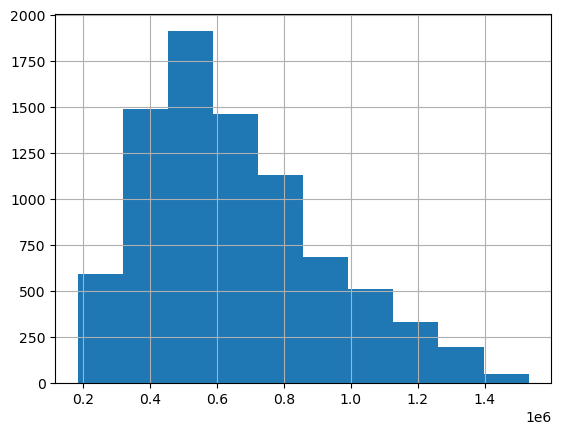

In [5]:
%matplotlib inline
# Creating Bar chart as the Target variable is Continuous
resData['Revenue'].hist()    

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

# Basic Data Exploration
This step is performed to guage the overall data. The volume of data, the types of columns present in the data. Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

This step helps to start the column rejection process. You must look at each column carefully and ask, does this column affect the values of the Target variable? For example in this case study, you will ask, <b>does this column affect the Price of the computer?</b> If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

There are four commands which are used for Basic data exploration in Python
* <b>head()</b> : This helps to see a few sample rows of the data
* <b>info() </b>: This provides the summarized information of the data
* <b>describe() </b>: This provides the descriptive statistical details of the data
* <b>nunique()</b>: This helps us to identify if a column is categorical or continuous

In [3]:
resData.nunique() 

Name                      8368
Location                     3
Cuisine                      6
Rating                      21
Seating Capacity            61
Average Meal Price        3966
Marketing Budget          4396
Social Media Followers    7799
Chef Experience Years       19
Number of Reviews          949
Avg Review Length         8368
Ambience Score              91
Service Quality Score       91
Parking Availability         2
Weekend Reservations        89
Weekday Reservations        89
Revenue                   8368
dtype: int64

In [4]:
# Looking at sample rows in the data
resData.head(3)

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62


In [5]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
resData.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [6]:
# Looking at the descriptive statistics of the data
resData.describe(include='all')  

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
count,8368,8368,8368,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368,8368.000000,8368.000000,8.368000e+03
unique,8368,3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
top,Restaurant 0,Downtown,French,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
freq,1,2821,1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4189,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,NaN,29.491754,29.235301,6.560706e+05
std,NaN,NaN,NaN,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,NaN,20.025415,20.004277,2.674137e+05
min,NaN,NaN,NaN,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,NaN,0.000000,0.000000,1.847085e+05
25%,NaN,NaN,NaN,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,NaN,13.000000,13.000000,4.546514e+05
50%,NaN,NaN,NaN,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,NaN,27.000000,26.000000,6.042421e+05
75%,NaN,NaN,NaN,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,NaN,43.000000,43.000000,8.130942e+05


# Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your 
observations regaring each column. Hence, creating a initial roadmap for further analysis. 

The selected columns in this step are not final, further study will be done and then a final list will be created

* <b>Price</b>: Continuous. Selected. This is the <b>Target Variable!</b>
* <b>Age</b>: Continuous. Selected.
* <b>KM</b>: Continuous. Selected.
* <b>FuelType</b>: Categorical. Selected.
* <b>HP</b>: Categorical. Selected.
* <b>MetColor</b>: Categorical. Selected.
* <b>Automatic</b>: Categorical. Selected.
* <b>CC</b>: Categorical. Selected.
* <b>Doors</b>: Categorical. Selected.
* <b>Weight</b>: Continuous. Selected.

# Removing useless columns from the data

There are no qualitative columns in this data

In [10]:
resData.head() 

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [7]:
UselessColumns=['Name'] 
resData=resData.drop(UselessColumns,axis=1)
resData.head()   

,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

### Visualize distribution of all the Categorical Predictor variables in the data using bar plots
We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.

Based on the Basic Data Exploration above, we have spotted six categorical predictors in the data

<b>Categorical Predictors: </b>

'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'
    
We use bar charts to see how the data is distributed for these categorical columns.

In [12]:
resData.nunique()

Location                     3
Cuisine                      6
Rating                      21
Seating Capacity            61
Average Meal Price        3966
Marketing Budget          4396
Social Media Followers    7799
Chef Experience Years       19
Number of Reviews          949
Avg Review Length         8368
Ambience Score              91
Service Quality Score       91
Parking Availability         2
Weekend Reservations        89
Weekday Reservations        89
Revenue                   8368
dtype: int64

In [13]:
colsToPlot=['Location', 'Cuisine', 'Rating', 'Chef Experience Years'] 

In [8]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber]) 

In [15]:
len(['Price','Age','FuelType']) 

3

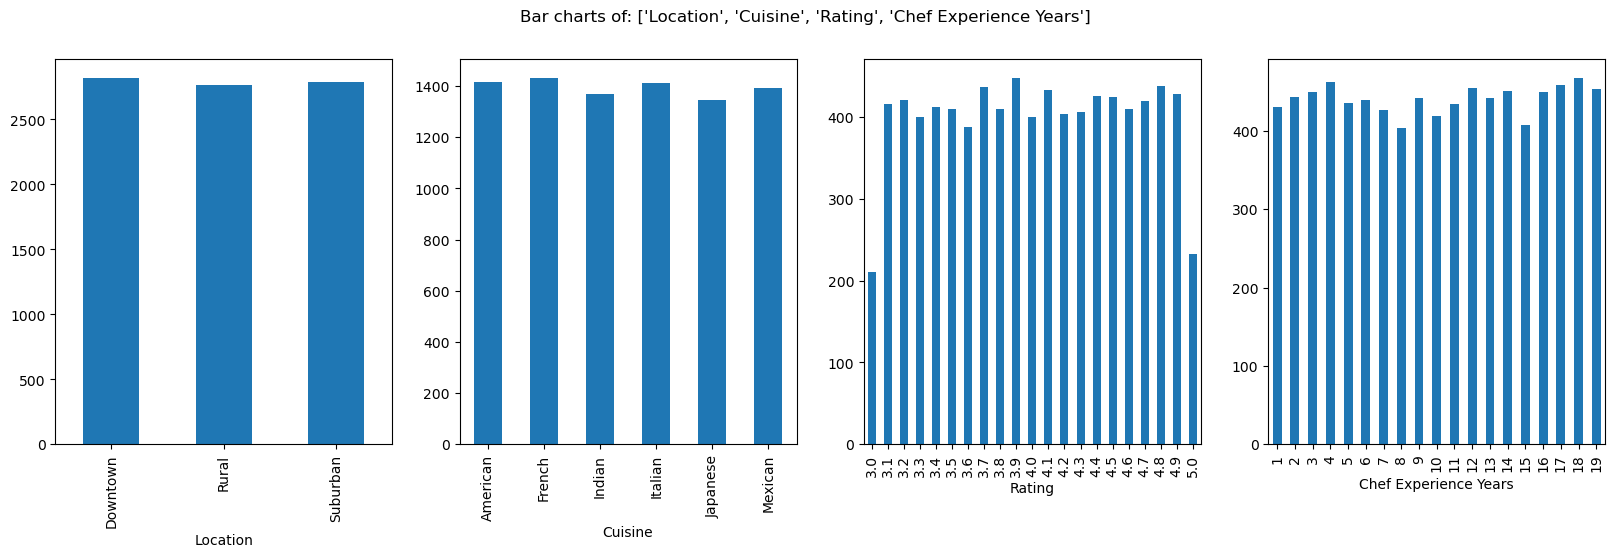

In [9]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=resData, colsToPlot=[ 'Location','Cuisine', 'Rating', 'Chef Experience Years'])    

In [17]:
columnsformachinelearning=['Cuisine', 'Rating', 'Chef Experience Years']  

In [18]:
UselessColumns=[ 'Rating', 'Chef Experience Years'] 
resData=resData.drop(UselessColumns,axis=1)
resData.head()  

,Location,Cuisine,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,38,73.98,2224,23406,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Downtown,Mexican,76,28.11,4416,42741,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Rural,Italian,48,48.29,2796,37285,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Rural,Italian,34,51.55,1167,15214,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Downtown,Japanese,88,75.98,3639,40171,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [19]:
resData.head(5) 

,Location,Cuisine,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,38,73.98,2224,23406,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Downtown,Mexican,76,28.11,4416,42741,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Rural,Italian,48,48.29,2796,37285,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Rural,Italian,34,51.55,1167,15214,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Downtown,Japanese,88,75.98,3639,40171,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [20]:
ul=['Parking Availability'] 
resData=resData.drop(ul,axis=1)  
resData.head() 

,Location,Cuisine,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,38,73.98,2224,23406,185,161.924906,1.3,7.0,13,4,638945.52
1,Downtown,Mexican,76,28.11,4416,42741,533,148.759717,2.6,3.4,48,6,490207.83
2,Rural,Italian,48,48.29,2796,37285,853,56.849189,5.3,6.7,27,14,541368.62
3,Rural,Italian,34,51.55,1167,15214,82,205.433265,4.6,2.8,9,17,404556.80
4,Downtown,Japanese,88,75.98,3639,40171,78,241.681584,8.6,2.1,37,26,1491046.35


## Bar Charts Interpretation
These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.

In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data for the ML algorithm to learn.

If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.

<b>Selected Categorical Variables</b>: All the categorical variables are selected for further analysis.

'FuelType', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors'

In [21]:
resData.head()

,Location,Cuisine,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,38,73.98,2224,23406,185,161.924906,1.3,7.0,13,4,638945.52
1,Downtown,Mexican,76,28.11,4416,42741,533,148.759717,2.6,3.4,48,6,490207.83
2,Rural,Italian,48,48.29,2796,37285,853,56.849189,5.3,6.7,27,14,541368.62
3,Rural,Italian,34,51.55,1167,15214,82,205.433265,4.6,2.8,9,17,404556.80
4,Downtown,Japanese,88,75.98,3639,40171,78,241.681584,8.6,2.1,37,26,1491046.35


### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, Three continuous predictor variables 'ApplicantIncome', 'CoapplicantIncome',and 'LoanAmount'.

array([[<Axes: title={'center': 'Average Meal Price'}>,
        <Axes: title={'center': 'Revenue'}>]], dtype=object)

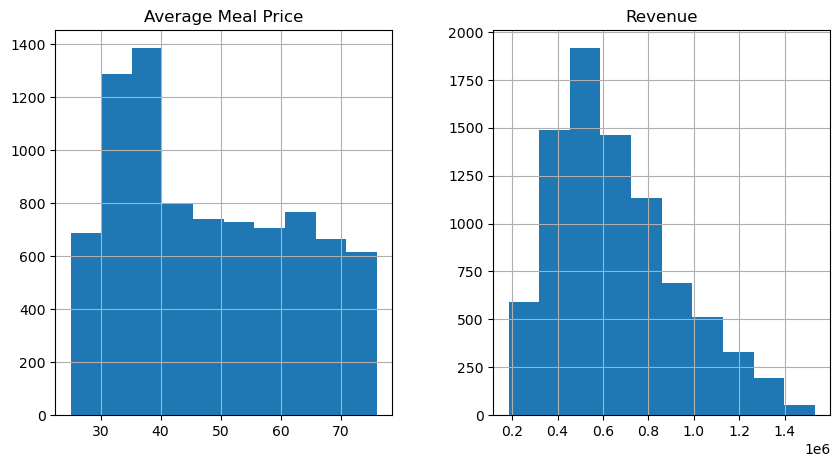

In [10]:
# Plotting histograms of multiple columns together
resData.hist(['Average Meal Price','Revenue'], figsize=(10,5))  

## Histogram Interpretation
Histograms shows us the data distribution for a single continuous variable.

The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above histogram of "Age", there are around 300 rows in data that has a value between 70 to 80.

The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatment should be done and the column should be re-examined, if that also does not solve the problem then only reject the column.

<b>Selected Continuous Variables:</b>
* <b>Price</b> : Selected. The distribution is good. Outliers are seen near 30000, need to treat them
* <b>KM</b>: Selected. The distribution is good.
* <b>Age</b>: Selected. The distribution is good.
* <b>Weight</b>: Selected. The distribution is good. Outliers are seen beyond 1400, need to treat them.

In [23]:
resData.nunique()

Location                     3
Cuisine                      6
Seating Capacity            61
Average Meal Price        3966
Marketing Budget          4396
Social Media Followers    7799
Number of Reviews          949
Avg Review Length         8368
Ambience Score              91
Service Quality Score       91
Weekend Reservations        89
Weekday Reservations        89
Revenue                   8368
dtype: int64

array([[<Axes: title={'center': 'Seating Capacity'}>,
        <Axes: title={'center': 'Average Meal Price'}>,
        <Axes: title={'center': 'Marketing Budget'}>],
       [<Axes: title={'center': 'Social Media Followers'}>,
        <Axes: title={'center': 'Number of Reviews'}>,
        <Axes: title={'center': 'Avg Review Length'}>],
       [<Axes: title={'center': 'Ambience Score'}>,
        <Axes: title={'center': 'Service Quality Score'}>,
        <Axes: title={'center': 'Weekend Reservations'}>],
       [<Axes: title={'center': 'Weekday Reservations'}>,
        <Axes: title={'center': 'Revenue'}>, <Axes: >]], dtype=object)

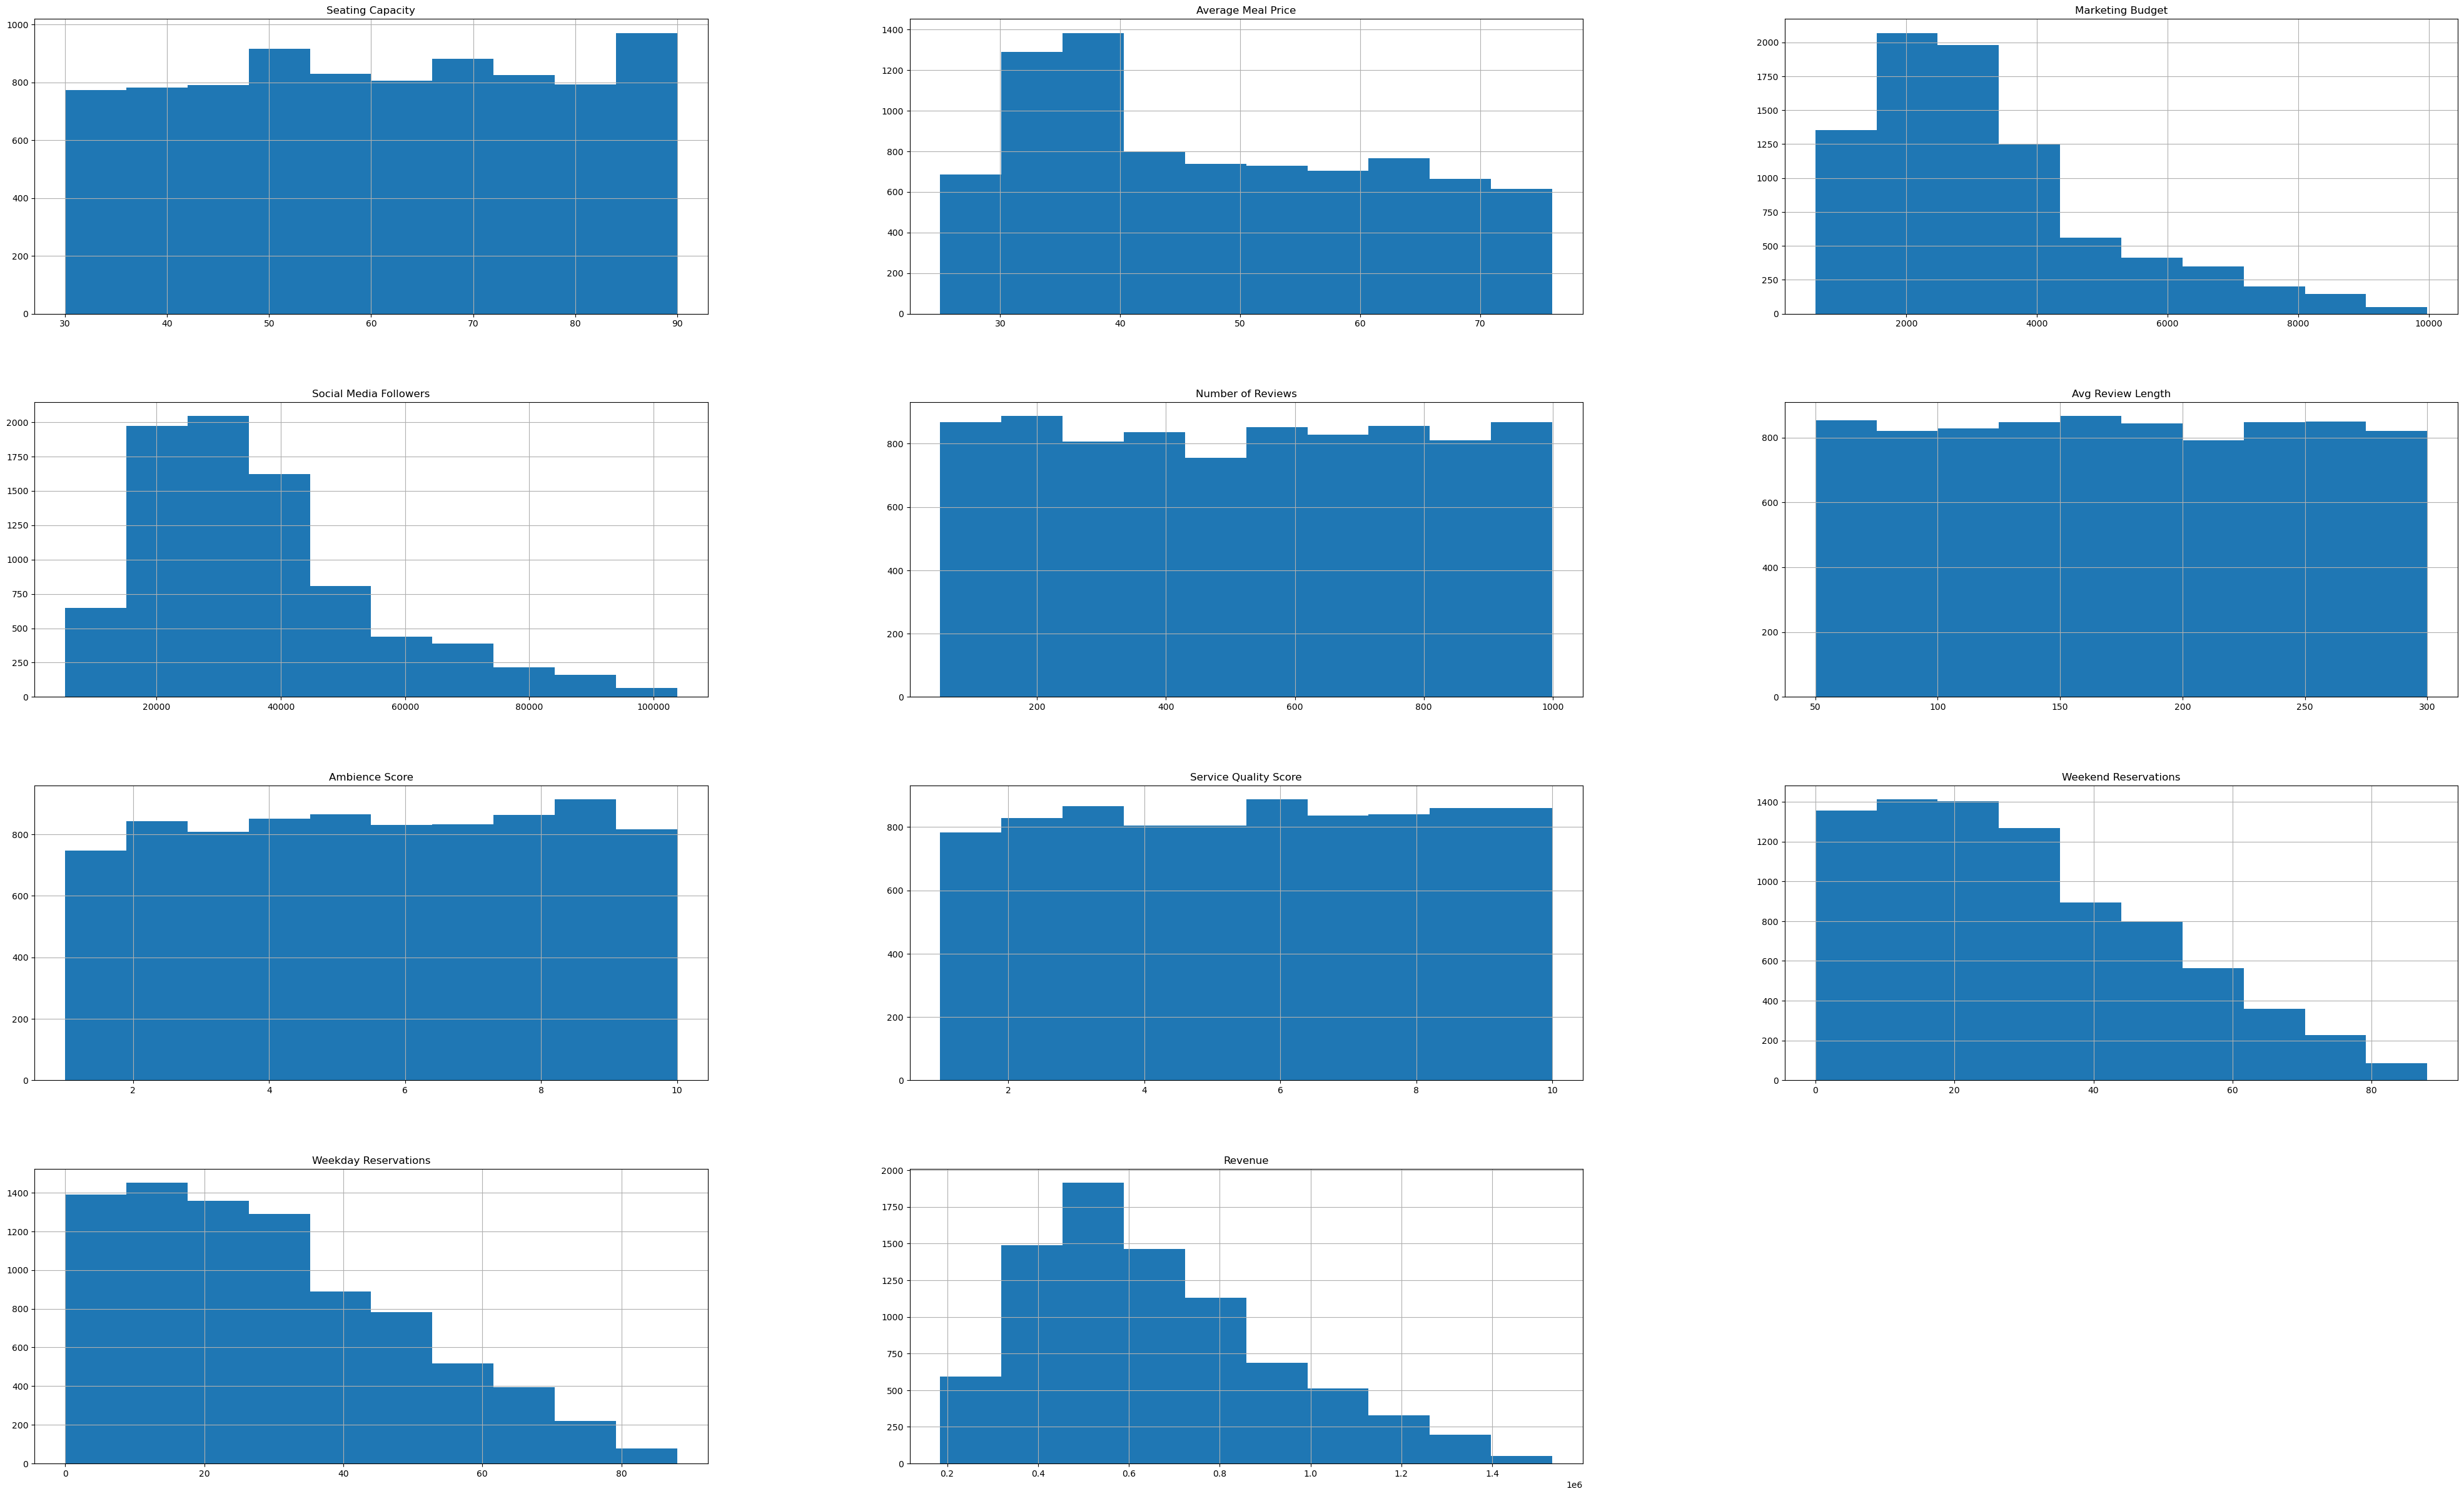

In [24]:
resData.hist(['Seating Capacity','Average Meal Price', 'Marketing Budget' , 'Social Media Followers','Number of Reviews','Avg Review Length','Ambience Score',
'Service Quality Score','Weekend Reservations','Weekday Reservations','Revenue'], figsize=(50,30))   

In [25]:
finalisedvariables=['Seating Capacity','Number of Reviews','Avg Review Length','Ambience Score','Service Quality Score'] 

In [26]:
resData=resData.drop(finalisedvariables,axis=1)  

In [27]:
resData.head()

,Location,Cuisine,Average Meal Price,Marketing Budget,Social Media Followers,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,73.98,2224,23406,13,4,638945.52
1,Downtown,Mexican,28.11,4416,42741,48,6,490207.83
2,Rural,Italian,48.29,2796,37285,27,14,541368.62
3,Rural,Italian,51.55,1167,15214,9,17,404556.80
4,Downtown,Japanese,75.98,3639,40171,37,26,1491046.35


In [28]:
resData=resData.groupby(['Revenue'])
resData

In [29]:
resData.head(2)

,Location,Cuisine,Average Meal Price,Marketing Budget,Social Media Followers,Weekend Reservations,Weekday Reservations,Revenue
0,Rural,Japanese,73.98,2224,23406,13,4,638945.52
1,Downtown,Mexican,28.11,4416,42741,48,6,490207.83
2,Rural,Italian,48.29,2796,37285,27,14,541368.62
3,Rural,Italian,51.55,1167,15214,9,17,404556.80
4,Downtown,Japanese,75.98,3639,40171,37,26,1491046.35
...,...,...,...,...,...,...,...,...
8363,Suburban,Indian,34.85,1102,11298,37,0,434653.45
8364,Rural,Indian,36.88,1988,20432,37,21,414977.92
8365,Downtown,Italian,46.87,5949,63945,83,21,930395.87
8366,Rural,American,44.53,707,7170,6,21,311493.48


# Outlier treatment
Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the histogram.

Outlier must be treated one column at a time. As the treatment will be slightly different for each column.

<b>Why I should treat the outliers?</b>

Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from majority of the data.

There are below two options to treat outliers in the data. 

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value

Below we are finding out the most logical value to be replaced in place of outliers by looking at the histogram.

### Treating outliers for 'Weight' column

In [30]:
CarPricesData['Price'].hist(figsize=[5,3],bins=21,color='steelblue') 

NameError: name 'CarPricesData' is not defined

In [ ]:
CarPricesData['Price'].hist(figsize=[5,3],bins=21,color='blue') 

In [ ]:
CarPricesData['Price'][CarPricesData['Price']>29000]=24990

In [ ]:
CarPricesData.info() 

In [ ]:
CarPricesData['Weight'].hist(figsize=(5,3),color='steelblue',bins= 25)

In [ ]:
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False)

In [ ]:
CarPricesData['Weight'][CarPricesData['Weight']>1400]=1320

In [ ]:
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False)

In [ ]:
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False)

In [ ]:
CarPricesData['Weight'][CarPricesData['Weight']>1400]

In [ ]:
# Counting the number of rows having outliers
len(CarPricesData['Weight'][CarPricesData['Weight']>1400])

In [ ]:
# Finding logical value near 1400
CarPricesData['Weight'][CarPricesData['Weight']<1400].sort_values(ascending=False) 

Based on the above output, the nearest logical value is 1320, hence, replacing any value greater than 1400 with it.

In [ ]:
# Replacing outliers with nearest logical value
CarPricesData['Weight'][CarPricesData['Weight']>1400]=1320

## Treating outliers for Price column

In [ ]:
resData['Revenue'].hist(bins=30,color='steelblue',figsize=(5,3))

In [ ]:
resData.head(6)

In [ ]:
CarPricesData['Weight'].hist(figsize=[10,5]) 

In [ ]:
CarPricesData['Price'][CarPricesData['Price']<29000].sort_values(ascending=False) 

In [ ]:
CarPricesData['Price'][CarPricesData['Price']>29000]=24990

# Visualizing the distribution again after outlier treatment

In [ ]:
CarPricesData.columns

In [ ]:
CarPricesData.head()

In [ ]:
# Histogram for weight after outlier treatment
CarPricesData[['Weight', 'Price']].hist(figsize=(25,5)) 

The distribution has improved after the outlier treatment. There is still a tail on the right side, but it is thick, hence it is acceptable.

In [ ]:
resData.info()

# Missing values treatment
Missing values are treated for each column separately.

If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected because too much information is missing.

There are below options for treating missing values in data.

* Interpolate the values based on business logic
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Delete the missing value rows if there are only few records

In [ ]:
CarPricesData.head()

In [ ]:
CarPricesData.groupby('FuelType').mean() 

In [ ]:
CarPricesData.groupby('FuelType')['CC'].mean() 

In [ ]:
# Using Business Logic of other column
CarPricesData.groupby('FuelType')['CC'].mean()

In [ ]:
# Finding how many missing values are there for each column
print(CarPricesData.isnull().sum())
CarPricesData.isnull().sum().plot(kind='bar') # Added by Sreya!

I am treating missing values with Median for Continuous values, and Mode for categorical values.

In [ ]:
CarPricesData['FuelType'].mode()

In [ ]:
CarPricesData['FuelType'].mode()[0]

In [ ]:
CarPricesData['Weight'].median()

In [ ]:
# Treating missing values of categorical variable with MODE value 
CarPricesData['FuelType'].fillna(value=CarPricesData['FuelType'].mode()[0], inplace=True)
CarPricesData['CC'].fillna(value=CarPricesData['CC'].mode()[0], inplace=True) 

In [ ]:
CarPricesData.info()

In [ ]:
# Treating missing values of continuous variable with Median value 
CarPricesData['Weight'].fillna(value=CarPricesData['Weight'].median(), inplace=True) 
CarPricesData['Age'].fillna(value=CarPricesData['Age'].median(), inplace=True) 

In [ ]:
CarPricesData.info()

In [ ]:
# Checking missing values again after the treatment
CarPricesData.isnull().sum() 

## interpolation
Dont use it when there is skewness in the data

In [ ]:
Age=pd.Series([20,30,np.NaN,np.NaN, 40, 25, np.NaN, 35, np.NaN, np.NaN])
Age

In [ ]:
Age.interpolate()

In [ ]:
Gender=pd.Series(['M','F',np.NaN, 'M', 'F', np.NaN, 'Z','O','A','B'])
Gender

In [ ]:
Gender.interpolate(method='bfill')

In [ ]:
# interpolating categorical data
#CarPricesData['FuelType'].interpolate(method='ffill', inplace=True)

In [ ]:
CarPricesData.head(2)

# Feature Selection (Bi-Variate analysis)
Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
This can be done directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

I have listed below the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

In this case study the Target variable is Continuous, hence below two scenarios will be present
* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

In [ ]:
resData.head(2)


In [ ]:
resData.(['Average Meal Price', 'Marketing Budget' , 'Social Media Followers','Cuisine','Rating'
'Chef Experience Years','Weekend Reservations','Weekday Reservations','Revenue'])  

In [ ]:
resData.nunique() 

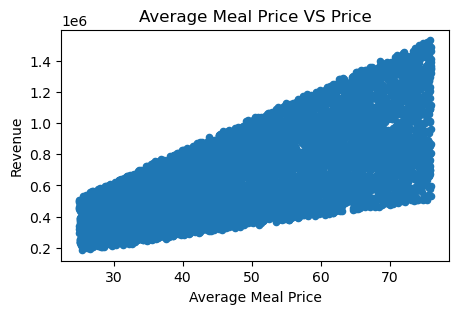

In [11]:
ContinuousCols=['Average Meal Price'] 
# Plotting scatter chart for each predictor vs the target variable 
for predictor in ContinuousCols:  
    resData.plot.scatter(x=predictor, y='Revenue', figsize=(5,3), title=predictor+" VS "+ 'Price')   

In [ ]:
revenue*avg meal price,marketing budget*social media followers

# Scatter charts interpretation
<b>What should you look for in these scatter charts? </b>

Trend.
You should try to see if there is a visible trend or not. There could be three scenarios
1. Increasing Trend:
This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!

2. Decreasing Trend:
This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!

3. No Trend:
You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.

Based on this chart you can get a good idea about the predictor, if it will be useful or not.
You confirm this by looking at the correlation value.

# Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

Pearson's correlation coefficient can simply be calculated as
the covariance between two features $x$ and $y$ (numerator) divided by the product
of their standard deviations (denominator):  

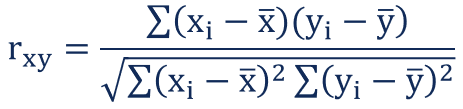

* This value can be calculated only between two numeric columns
* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship <b>the sign does not matter</b>
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question

In [ ]:
resData.head() 

In [12]:
# Calculating correlation matrix
ContinuousCols=['Revenue','Average Meal Price','Marketing Budget','Social Media Followers','Weekend Reservations','Weekday Reservations'] 

# Creating the correlation matrix 
CorrelationData=resData[ContinuousCols].corr()
CorrelationData        

,Revenue,Average Meal Price,Marketing Budget,Social Media Followers,Weekend Reservations,Weekday Reservations
Revenue,1.000000,0.686365,0.365322,0.354466,0.292400,0.273284
Average Meal Price,0.686365,1.000000,-0.002054,-0.005753,-0.018072,-0.027837
Marketing Budget,0.365322,-0.002054,1.000000,0.987511,0.225355,0.221088
Social Media Followers,0.354466,-0.005753,0.987511,1.000000,0.218451,0.214612
Weekend Reservations,0.292400,-0.018072,0.225355,0.218451,1.000000,0.179730
Weekday Reservations,0.273284,-0.027837,0.221088,0.214612,0.179730,1.000000


In [14]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Revenue'][abs(CorrelationData['Revenue']) > 0.5] 

Revenue               1.000000
Average Meal Price    0.686365
Name: Revenue, dtype: float64

In [ ]:
cd['Price'][abs(cd['Price'])>0.5] 

<b>Final selected Continuous columns:</b>

'Age','KM','Weight'

In [ ]:
abs(CorrelationData['Price'])>0.5

# Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots and measure the strength of relation using Anova test

In [ ]:
resData.nunique()


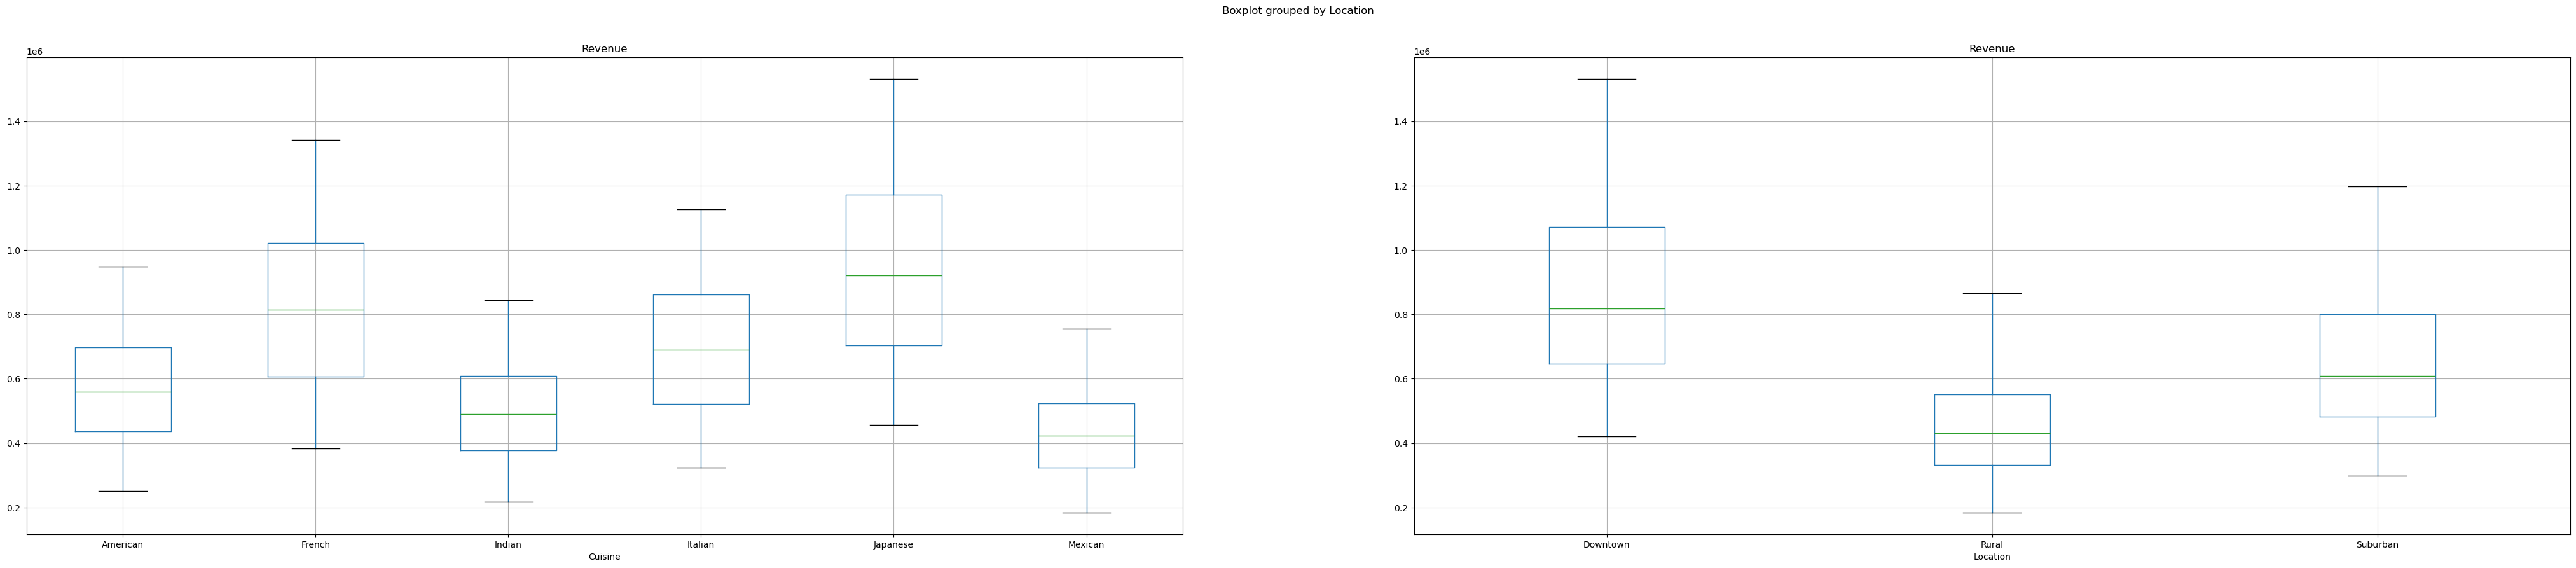

In [15]:
# Box plots for Categorical Target Variable "Price" and continuous predictors
CategoricalColsList=[ 'Cuisine','Location']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(50,10))

# Creating box plots for each continuous predictor against the Target Variable "Price" 
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
   resData.boxplot(column='Revenue', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])  

# Box-Plots interpretation
<b>What should you look for in these box plots? </b>

These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with Price.

In this data, all the categorical predictors looks correlated with the Target variable except "Fueltype","Automatic" and "MetColor" they seems like a border cases, as the boxes are close to each other.

We confirm this by looking at the results of ANOVA test below

# Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 being true

In [16]:
CategoryGroupLists=CarPricesData.groupby('FuelType')['Price'].apply(list)
CategoryGroupLists  

NameError: name 'CarPricesData' is not defined

In [17]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            # Accepting the H0 if the P value is more than 0.05
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors) 


In [18]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=[ 'Cuisine','Location']
FunctionAnova(inpData=resData, 
              TargetVariable='Revenue', 
              CategoricalPredictorList=CategoricalPredictorList)   

##### ANOVA Results ##### 

Cuisine is correlated with Revenue | P-Value: 0.0
Location is correlated with Revenue | P-Value: 0.0


['Cuisine', 'Location']

The results of ANOVA confirm our visual analysis using box plots above.

All categorical variables are correlated with the Target variable except "FuelType" and "Automatic". This is something we guessed by looking at the box plots!

<b>Final selected Categorical columns:</b>

'HP', 'MetColor', 'CC', 'Doors'

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [87]:
SelectedColumns=['Average Meal Price', 'Marketing Budget' , 'Social Media Followers','Cuisine','Rating',
'Chef Experience Years','Weekend Reservations','Weekday Reservations','Location']

# Selecting final columns
DataForML=resData[SelectedColumns] 
DataForML.head()   

,Average Meal Price,Marketing Budget,Social Media Followers,Cuisine,Rating,Chef Experience Years,Weekend Reservations,Weekday Reservations,Location
0,73.98,2224,23406,Japanese,4.0,13,13,4,Rural
1,28.11,4416,42741,Mexican,3.2,8,48,6,Downtown
2,48.29,2796,37285,Italian,4.7,18,27,14,Rural
3,51.55,1167,15214,Italian,4.4,13,9,17,Rural
4,75.98,3639,40171,Japanese,4.9,9,37,26,Downtown


In [51]:
import os
os.getcwd() 

'C:\\Users\\Siddhali\\Python\\Python IVY Feb-2024\\Python Project'

In [88]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')  

In [89]:
# Reading a pickle file
import pandas as pd
DataForML=pd.read_pickle('DataForML.pkl')
DataForML.head()  

,Average Meal Price,Marketing Budget,Social Media Followers,Cuisine,Rating,Chef Experience Years,Weekend Reservations,Weekday Reservations,Location
0,73.98,2224,23406,Japanese,4.0,13,13,4,Rural
1,28.11,4416,42741,Mexican,3.2,8,48,6,Downtown
2,48.29,2796,37285,Italian,4.7,18,27,14,Rural
3,51.55,1167,15214,Italian,4.4,13,9,17,Rural
4,75.98,3639,40171,Japanese,4.9,9,37,26,Downtown


In [90]:
DataForML=pd.get_dummies(DataForML)   

In [91]:
DataForML.head()

,Average Meal Price,Marketing Budget,Social Media Followers,Rating,Chef Experience Years,Weekend Reservations,Weekday Reservations,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Location_Downtown,Location_Rural,Location_Suburban
0,73.98,2224,23406,4.0,13,13,4,False,False,False,False,True,False,False,True,False
1,28.11,4416,42741,3.2,8,48,6,False,False,False,False,False,True,True,False,False
2,48.29,2796,37285,4.7,18,27,14,False,False,False,True,False,False,False,True,False
3,51.55,1167,15214,4.4,13,9,17,False,False,False,True,False,False,False,True,False
4,75.98,3639,40171,4.9,9,37,26,False,False,False,False,True,False,True,False,False


## Data Pre-processing for Machine Learning
List of steps performed on predictor variables before data can be used for machine learning
1. Converting each Ordinal Categorical columns to numeric
2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
3. Converting all other nominal categorical columns to numeric using pd.get_dummies()
4. Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable which is in string format.

## Converting the binary nominal variable to numeric using 1/0 mapping

There is no binary nominal variable in string format to be converted

## Converting the nominal variable to numeric using get_dummies()

In [92]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Revenue']=resData['Revenue']

# Printing sample rows
DataForML_Numeric.head() 

,Average Meal Price,Marketing Budget,Social Media Followers,Rating,Chef Experience Years,Weekend Reservations,Weekday Reservations,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Location_Downtown,Location_Rural,Location_Suburban,Revenue
0,73.98,2224,23406,4.0,13,13,4,False,False,False,False,True,False,False,True,False,638945.52
1,28.11,4416,42741,3.2,8,48,6,False,False,False,False,False,True,True,False,False,490207.83
2,48.29,2796,37285,4.7,18,27,14,False,False,False,True,False,False,False,True,False,541368.62
3,51.55,1167,15214,4.4,13,9,17,False,False,False,True,False,False,False,True,False,404556.80
4,75.98,3639,40171,4.9,9,37,26,False,False,False,False,True,False,True,False,False,1491046.35


In [75]:
DataForML_Numeric = DataForML_Numeric.applymap(lambda x: int(x) if isinstance(x, bool) else x)     

C:\Users\Siddhali\AppData\Local\Temp\ipykernel_4040\2434032447.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  DataForML_Numeric = DataForML_Numeric.applymap(lambda x: int(x) if isinstance(x, bool) else x)


# Machine Learning: Splitting the data into Training and Testing sample
We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [93]:
# Printing all the column names for our reference 
DataForML_Numeric.columns 

Index(['Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Rating', 'Chef Experience Years', 'Weekend Reservations',
       'Weekday Reservations', 'Cuisine_American', 'Cuisine_French',
       'Cuisine_Indian', 'Cuisine_Italian', 'Cuisine_Japanese',
       'Cuisine_Mexican', 'Location_Downtown', 'Location_Rural',
       'Location_Suburban', 'Revenue'],
      dtype='object')

In [58]:
resData.nunique() 

Location                     3
Cuisine                      6
Rating                      21
Seating Capacity            61
Average Meal Price        3966
Marketing Budget          4396
Social Media Followers    7799
Chef Experience Years       19
Number of Reviews          949
Avg Review Length         8368
Ambience Score              91
Service Quality Score       91
Parking Availability         2
Weekend Reservations        89
Weekday Reservations        89
Revenue                   8368
dtype: int64

In [103]:
# Separate Target Variable and Predictor Variables

Predictors=['Average Meal Price', 'Marketing Budget', 'Social Media Followers',
       'Rating', 'Chef Experience Years', 'Weekend Reservations',
       'Weekday Reservations', 'Cuisine_American', 'Cuisine_French',
       'Cuisine_Indian', 'Cuisine_Italian', 'Cuisine_Japanese',
       'Cuisine_Mexican', 'Location_Downtown', 'Location_Rural',
       'Location_Suburban']
TargetVariable='Revenue' 

# Simple Linear Regression (only one predictor)
#Predictors=['Age']|

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Polynomial Regression
# Uncomment below lines if you want to perform polynomial regression
from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree = 2, include_bias=False) 
#X = poly.fit_transform(X)
#Predictors=poly.get_feature_names_out() 

# Split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=41)

# Quick check on the shapes of train and test
print(X_train.shape) 
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape) 

(5857, 16)
(5857,)
(2511, 16)
(2511,)


In [95]:
y_train[0:5]

array([ 758585.45, 1042217.38,  643475.87, 1333932.81,  279860.31])

In [96]:
# Suppressing Scientific Notation in printing numpy arrays
np.set_printoptions(suppress=True) 
X_train[0:10]  

array([[47.94, 2170, 30337, 4.1, 9, 63, 47, False, False, False, True,
        False, False, False, False, True],
       [55.34, 6804, 71994, 3.9, 13, 51, 24, False, True, False, False,
        False, False, True, False, False],
       [34.56, 2004, 28447, 4.7, 8, 45, 14, False, False, False, False,
        False, True, True, False, False],
       [65.87, 7399, 76682, 3.8, 10, 20, 53, False, True, False, False,
        False, False, True, False, False],
       [35.62, 3388, 37855, 4.8, 14, 29, 1, True, False, False, False,
        False, False, False, True, False],
       [31.81, 8324, 91634, 5.0, 14, 20, 22, False, False, True, False,
        False, False, True, False, False],
       [38.73, 2885, 29227, 4.2, 18, 60, 32, True, False, False, False,
        False, False, False, False, True],
       [66.64, 6289, 65456, 3.8, 5, 13, 66, False, False, False, False,
        True, False, True, False, False],
       [42.71, 8832, 88718, 4.8, 10, 32, 42, True, False, False, False,
        Fals

In [97]:
y_train[0:10]   

array([ 758585.45, 1042217.38,  643475.87, 1333932.81,  279860.31,
        588804.53,  558607.95, 1302106.78,  700754.23,  757369.32])

# Multiple Linear Regression

In [ ]:
CarPricesData.nunique()

In [104]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)

# Taking the standardized values to original scale

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
prediction=LREG.predict(X_test)
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Revenue']-TestingDataResults['PredictedRevenue']))/TestingDataResults['Revenue'])

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable, 'APE']].head())

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=4, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2)) 

LinearRegression()
R2 Value: 0.9031191342276012

##### Model Validation and Accuracy Calculations ##########
  Average Meal Price Marketing Budget Social Media Followers Rating  \
0              44.51             1727                  18306    3.2   
1              31.11             3156                  34768    4.6   
2              67.06             3280                  42282    4.9   
3              41.35             3289                  38818    4.6   
4              61.57             5645                  63269    4.6   

  Chef Experience Years Weekend Reservations Weekday Reservations  \
0                    14                   63                   52   
1                     9                   54                   52   
2                     8                    2                   33   
3                     3                   46                   27   
4                     2                   64                   10   

  Cuisine_American Cuisine_French Cuisine_Indian 

In [ ]:
100* (abs(7500 - 8752.0)/7500)

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys() 

In [ ]:
TestingDataResults['RevenueAVG']=TestingDataResults['Revenue'].mean()
TestingDataResults.head() 


In [ ]:
TestingDataResults.head()

In [ ]:
resData.head()

KeyError: 'RevenueAVG'

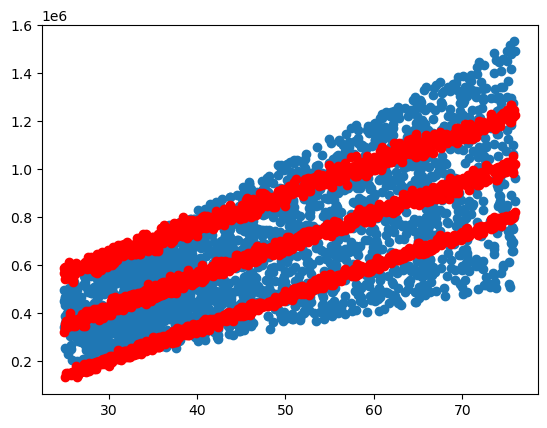

In [105]:
# Visualizing the line of best fit
%matplotlib inline 
import matplotlib.pyplot as plt 
plt.scatter(x=TestingDataResults['Average Meal Price'] , y=TestingDataResults['Revenue'])  
plt.scatter(TestingDataResults['Average Meal Price'],TestingDataResults['PredictedRevenue'], color='red')
plt.plot(TestingDataResults['Average Meal Price'] ,TestingDataResults['RevenueAVG'], color='green') 

In [ ]:
SelectedColumns=['Age','KM','Weight','HP', 'MetColor', 'CC', 'Doors']

In [65]:
# Looking at the coefficients for each column
LREG.coef_

array([-0., -0.,  0.,  0., -0., -0., -0.,  1., -0.,  0., -0.,  0.,  0.,
       -0.])

In [66]:
# Looking at the intercept
LREG.intercept_

1.3969838619232178e-09

In [ ]:
# SLR Equation
# Price=-173.30(Age)+20458.62

In [ ]:
# MLR Equation
# Price= -118.38(Age) -0.016(KM)....-10869

# Decision Trees

DecisionTreeRegressor(max_depth=4)
R2 value: 0.9195020149317672


<Axes: >

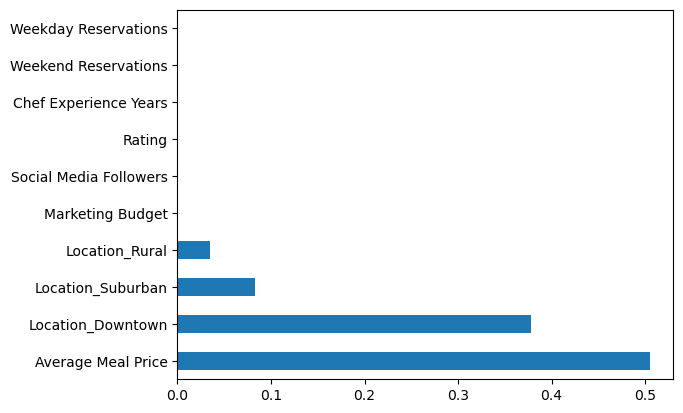

In [106]:
from sklearn.tree import DecisionTreeRegressor
RegModel=DecisionTreeRegressor(max_depth=4,criterion="squared_error")
print(RegModel)
DT=RegModel.fit(X_train,y_train)  
from sklearn import metrics
print('R2 value:', metrics.r2_score(y_train, DT.predict(X_train))) 
feature_importances=pd.Series(DT.feature_importances_ , index= Predictors) 
feature_importances.nlargest(10).plot(kind='barh')


DecisionTreeRegressor(max_depth=3)
R2 Value: 0.8652701121862016

##### Model Validation and Accuracy Calculations ##########
      Revenue  PredictedRevenue
0   704643.06          501135.0
1   543490.90          599110.0
2   697555.64          567793.0
3   568947.60          501135.0
4  1161144.85          997698.0
Mean Accuracy on test data: 86.35590075378373
Median Accuracy on test data: 88.8675559616416

Accuracy values for 10-fold Cross Validation:
 [86.52027275 86.19232529 86.33792689 86.29876071 85.8701263  86.68771234
 85.76233969 86.00351992 86.74393889 86.93399673]

Final Average Accuracy of the model: 86.34


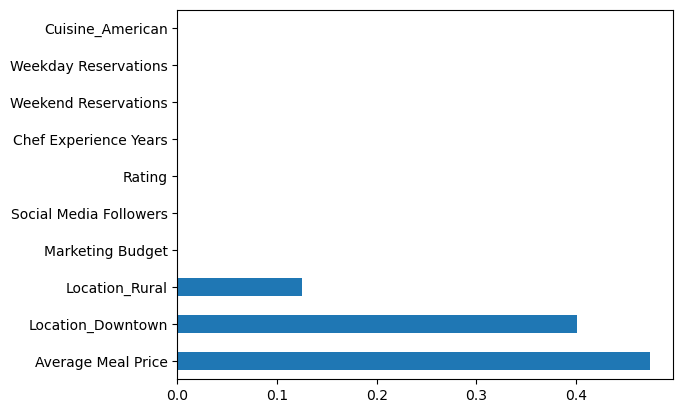

In [107]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor 
RegModel = DecisionTreeRegressor(max_depth=3, criterion="squared_error") 
# Good Range of hyper parameter Max_depth = 2 to 20

# Printing all the parameters of Decision Tree 
print(RegModel)   

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')
prediction=DT.predict(X_test)
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Revenue']-TestingDataResults['PredictedRevenue']))/TestingDataResults['Revenue'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

### Plotting a Decision Tree

In [ ]:
# Installing the required library for plotting the decision tree
# Make sure to run all three commands
# 1. Open anaconda Prompt / people with mac run on terminal
# pip install graphviz
# conda install graphviz
# pip install pydotplus 

In [ ]:
# Adding graphviz path to the PATH env variable
# Try to find "dot.exe" in your system and provide the path of that folder
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Siddhali/anaconda3/Library/bin' 

In [ ]:
np.var(y_train)

In [ ]:
np.mean(y_train)

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None, 
                                feature_names=Predictors)
# printing the rules
print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1200,height=900)
# Double click on the graph to zoom in

In [ ]:
# Saving the figure in current working directory
import matplotlib.pyplot as plt
currentFig=plt.gcf()
currentFig.savefig('DecisionTree.JPEG')